<a href="https://colab.research.google.com/github/Farrelino77/Metnum_Pertemuan11_Bagas-Farrelino-H.P/blob/main/Metnum_Pertemuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

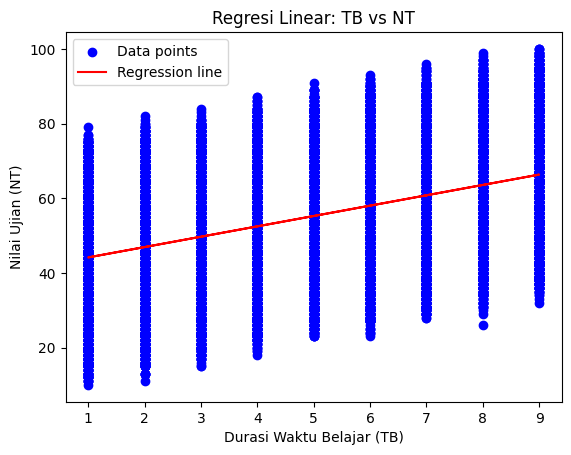

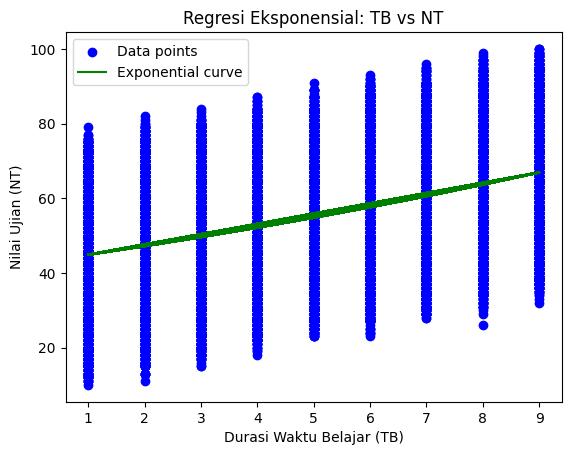

(LinearRegression(),
 17.819474832547773,
 array([42.68866136,  0.04991553]),
 17.82862874184672)

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Membaca data
file_path = 'Student_Performance.csv'
data = pd.read_csv(file_path)

# Mengganti nama kolom untuk kemudahan
data = data.rename(columns={
    'Hours Studied': 'TB',
    'Sample Question Papers Practiced': 'NL',
    'Performance Index': 'NT'
})

# Fungsi untuk regresi linear dan plot
def linear_regression_and_plot(x, y, x_label, y_label, title):
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    plt.scatter(x, y, color='blue', label='Data points')
    plt.plot(x, y_pred, color='red', label='Regression line')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()
    rms_error = np.sqrt(np.mean((y - y_pred)**2))
    return model, rms_error

# Fungsi untuk regresi eksponensial dan plot
def exp_func(x, a, b):
    return a * np.exp(b * x)

def exponential_regression_and_plot(x, y, x_label, y_label, title):
    params, _ = curve_fit(exp_func, x, y, p0=(1, 0.01))
    y_pred = exp_func(x, *params)
    plt.scatter(x, y, color='blue', label='Data points')
    plt.plot(x, y_pred, color='green', label='Exponential curve')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()
    rms_error = np.sqrt(np.mean((y - y_pred)**2))
    return params, rms_error

# Linear Regression untuk TB vs NT
x_tb = data['TB']
y_nt = data['NT']
linear_model_tb_nt, rms_error_tb_nt_linear = linear_regression_and_plot(x_tb, y_nt, 'Durasi Waktu Belajar (TB)', 'Nilai Ujian (NT)', 'Regresi Linear: TB vs NT')

# Exponential Regression untuk TB vs NT
exp_params_tb_nt, rms_error_tb_nt_exp = exponential_regression_and_plot(x_tb, y_nt, 'Durasi Waktu Belajar (TB)', 'Nilai Ujian (NT)', 'Regresi Eksponensial: TB vs NT')

linear_model_tb_nt, rms_error_tb_nt_linear, exp_params_tb_nt, rms_error_tb_nt_exp
